In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
%matplotlib inline


In [2]:
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
train.drop(["Name","Ticket","Fare","PassengerId","Cabin"],axis=1,inplace=True)

In [9]:
test.drop(["Name","Ticket","Fare","PassengerId","Cabin"],axis=1,inplace=True)

In [10]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [11]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


In [12]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [13]:
train["Age"].mean()

29.69911764705882

In [14]:
test["Age"].mean()

30.272590361445783

In [15]:
train["Age"].fillna(30.0,inplace=True)

In [16]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [17]:
test["Age"].fillna(30.0,inplace=True)

In [18]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

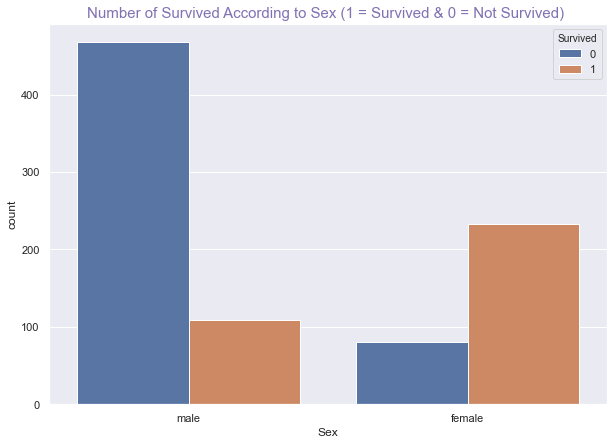

In [59]:
sns.set()
plt.figure(figsize=(10,7))
sns.countplot(x="Sex",data=train,hue="Survived")
plt.title("Number of Survived According to Sex (1 = Survived & 0 = Not Survived) ",color='m',fontsize = 15)
plt.show()

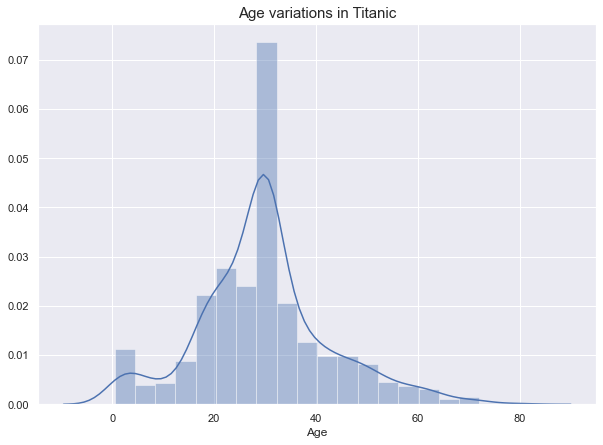

In [67]:
sns.set()
plt.figure(figsize=(10,7))
sns.distplot(train["Age"],bins = 20)
plt.title("Age variations in Titanic",fontsize=15)
plt.show()

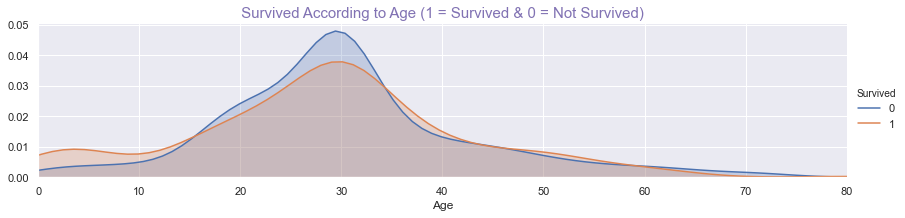

In [65]:
facet = sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()
plt.title(" Survived According to Age (1 = Survived & 0 = Not Survived) ",color='m',fontsize = 15)
plt.show()

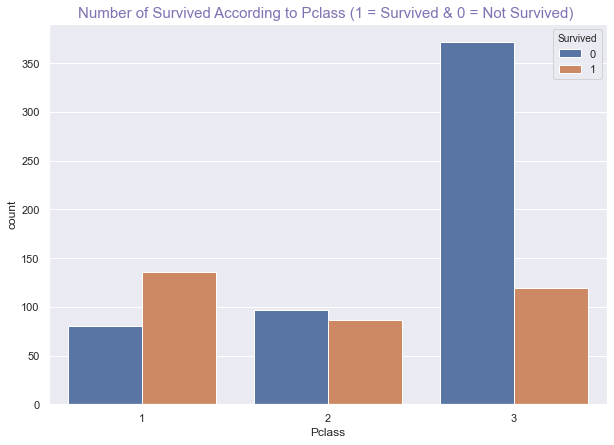

In [60]:
sns.set()
plt.figure(figsize=(10,7))
sns.countplot(x="Pclass",data=train,hue="Survived")
plt.title("Number of Survived According to Pclass (1 = Survived & 0 = Not Survived) ",color='m',fontsize = 15)
plt.show()

In [23]:
train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

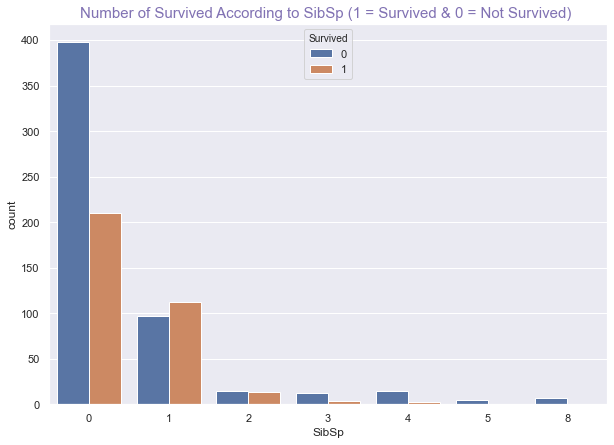

In [63]:
sns.set()
plt.figure(figsize=(10,7))
sns.countplot(x="SibSp",data=train,hue="Survived")
plt.title("Number of Survived According to SibSp (1 = Survived & 0 = Not Survived) ",color='m',fontsize = 15)
plt.show()

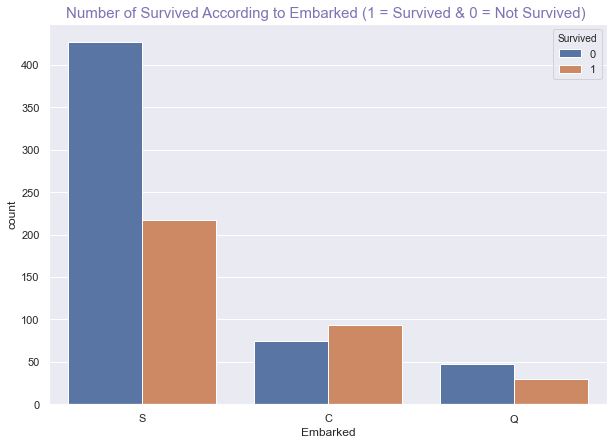

In [64]:
sns.set()
plt.figure(figsize=(10,7))
sns.countplot(x="Embarked",data=train,hue="Survived")
plt.title("Number of Survived According to Embarked (1 = Survived & 0 = Not Survived) ",color='m',fontsize = 15)
plt.show()

## Now let's convert the String Values into Numerical Values

In [26]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [27]:
dummies = pd.get_dummies(train["Sex"],drop_first=True)

In [28]:
train1 = pd.concat([train,dummies],axis=1)

In [29]:
train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,male
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,0
2,1,3,female,26.0,0,0,S,0
3,1,1,female,35.0,1,0,S,0
4,0,3,male,35.0,0,0,S,1


In [30]:
train1.drop("Sex",axis=1,inplace=True)

In [31]:
train1.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,male
0,0,3,22.0,1,0,S,1
1,1,1,38.0,1,0,C,0
2,1,3,26.0,0,0,S,0
3,1,1,35.0,1,0,S,0
4,0,3,35.0,0,0,S,1


In [32]:
dummies2 = pd.get_dummies(train1["Embarked"],drop_first=True)

In [33]:
train2 = pd.concat([train1,dummies2],axis=1)

In [34]:
train2.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,male,Q,S
0,0,3,22.0,1,0,S,1,0,1
1,1,1,38.0,1,0,C,0,0,0
2,1,3,26.0,0,0,S,0,0,1
3,1,1,35.0,1,0,S,0,0,1
4,0,3,35.0,0,0,S,1,0,1


In [35]:
train2.drop("Embarked",axis=1,inplace=True)

In [36]:
train2.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


In [37]:
dummies = pd.get_dummies(test["Sex"],drop_first=True)

In [38]:
test1 = pd.concat([test,dummies],axis=1)

In [39]:
test1.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,male
0,3,male,34.5,0,0,Q,1
1,3,female,47.0,1,0,S,0
2,2,male,62.0,0,0,Q,1
3,3,male,27.0,0,0,S,1
4,3,female,22.0,1,1,S,0


In [40]:
test1.drop("Sex",axis=1,inplace=True)
test1.head()

,Pclass,Age,SibSp,Parch,Embarked,male
0,3,34.5,0,0,Q,1
1,3,47.0,1,0,S,0
2,2,62.0,0,0,Q,1
3,3,27.0,0,0,S,1
4,3,22.0,1,1,S,0


In [41]:
dummies2 = pd.get_dummies(test1["Embarked"],drop_first=True)
test2 = pd.concat([test1,dummies2],axis=1)

In [42]:
test2.drop("Embarked",axis=1,inplace=True)

In [43]:
test2.head()

,Pclass,Age,SibSp,Parch,male,Q,S
0,3,34.5,0,0,1,1,0
1,3,47.0,1,0,0,0,1
2,2,62.0,0,0,1,1,0
3,3,27.0,0,0,1,0,1
4,3,22.0,1,1,0,0,1


## Now let's Find the Best model for our Dataset

In [44]:
x = train2.drop("Survived",axis=1)
y = train2["Survived"]

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [46]:
model_params = {
    "svm" :{
        "model": SVC(gamma="auto"),
        "params":{
            "C" : [1,10,20],
            "kernel":["rbf"]
        }
                     
    },
    "decision_tree":{
        "model": DecisionTreeClassifier(),
        "params":{
            "criterion" :["entropy","gini"],
            "max_depth" : [5,8,9]
        }
    },
    "random_forest":{
        "model" : RandomForestClassifier(),
        "params":{
            "n_estimators":[1,5,10],
            "max_depth" : [5,8,9]
        }
    },
    "naive_bayes":{
        "model": GaussianNB(),
        "params":{}
        
    }
}

In [47]:
scores=[]
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp["params"],cv=8,return_train_score=False)
    clf.fit(x,y)
    scores.append({
        "Model": model_name,
        "Best_Params": clf.best_params_,
        "Best_Score": clf.best_score_
    })

In [48]:
df = pd.DataFrame(scores, columns=["Model","Best_Score","Best_Params"])

In [49]:
df

,Model,Best_Score,Best_Params
0,svm,0.800304,"{'C': 1, 'kernel': 'rbf'}"
1,decision_tree,0.821579,"{'criterion': 'gini', 'max_depth': 5}"
2,random_forest,0.822716,"{'max_depth': 5, 'n_estimators': 10}"
3,naive_bayes,0.780094,{}


In [54]:
clf_dt =DecisionTreeClassifier(criterion="gini",max_depth=5)
score = cross_val_score(clf_dt,x,y,cv=8,scoring="accuracy")
score

array([0.77678571, 0.8125    , 0.85714286, 0.86486486, 0.8018018 ,
       0.78378378, 0.81081081, 0.87387387])

In [55]:
score.mean()

0.8226954633204633

In [56]:
x_test = test2.iloc[:,:]

In [57]:
clf.predict(x_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,